In [11]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [3]:
class LinearRegression:
    
    def __init__(self, learning_rate = 0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.slopes = None
        self.intercept = None
    
    def fit(self, X, y):
        
        numSamples, numFeatures = X.shape
        #initialize params at zero. We have a param for each feature in the dataset and one for the intercept
        self.slopes = np.zeros(numFeatures)
        self.intercept = 0
        
        #run gradient descent until the maximum number of iterations is met (user-defined)
        for i in range(self.n_iters):
            #calculate the prediction for each observation using the current slopes/intercept
            predictions = np.dot(X, self.slopes) + self.intercept
            
            #calculate the partial derivative (gradient) of the loss function (MSE) with respect to each parameter
            dSlope = np.dot(X.T,(predictions-y) ) * (1/numSamples) #len(dSlope) = number of features
            dIntercept = sum(predictions-y) * (1/numSamples)
            
            #update the parameters using the calculated gradients and user-defined learning rate
            self.slopes = self.slopes - self.learning_rate * dSlope
            self.intercept = self.intercept - self.learning_rate * dIntercept
            
    def predict(self, X):
        return np.dot(X, self.slopes) + self.intercept
        
        

In [35]:
X, y = datasets.make_regression(n_samples=500, noise=10, random_state=123, n_features=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=123)

In [36]:
model = LinearRegression()
model.fit(X_train,  Y_train)
predictions = model.predict(X_test)

In [37]:
mean_squared_error(Y_test, predictions)

109.39106138829331

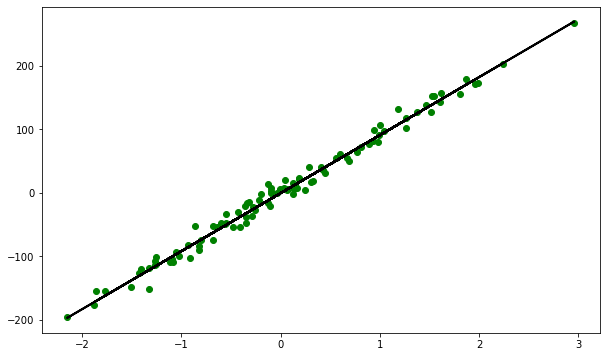

In [40]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, predictions, color='black', linewidth=2)